In [15]:



import pandas as pd
import numpy as np
import random as rnd

from sklearn.cross_validation import KFold, cross_val_score

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



train_=pd.read_csv('../train_allcols.csv')
validate_=pd.read_csv('../validate_allcols.csv')
#test=pd.read_csv('../testwDSM.csv')

train_.shape, validate_.shape, #test.shape

((301619, 62), (148560, 62))

In [16]:
train = train_.query('DSMCRIT < 14')
validate = validate_.query('DSMCRIT < 14')
#print train['DSMCRIT'].value_counts()
print train.shape

(295879, 62)


In [17]:
#alcohol
#print train['DSMCRIT'].value_counts() / train['DSMCRIT'].count()
#print train['SUB1'].value_counts() / train['SUB1'].count()

In [18]:
#train.query('SUB1 == 4')['DSMCRIT'].value_counts() / train.query('SUB1 == 4')['DSMCRIT'].count()

In [19]:
#train.describe()
train = train.sample(20000)
validate = validate.sample(6000)
train.shape, #validate.shape, #validate.head(2)

((20000, 62),)

In [37]:
#train = train.query('SUB1 <= 10').query('SUB2 <= 10')
#validate = validate.query('SUB1 <= 10').query('SUB2 <= 10')

drop_list = ['DSMCRIT',  #'NUMSUBS'
             ]
drop_list_select = ['RACE', 'PREG', 'ARRESTS', 'PSYPROB', 'DETNLF', 'ETHNIC', 'MARSTAT', 'GENDER', 'EDUC'
                   ,'LIVARAG', 'EMPLOY', 'SUB3']

retain_list = ['RACE','PCPFLG','PRIMINC','LIVARAG','BENZFLG','HLTHINS','GENDER','ROUTE3','PRIMPAY',
               'MARSTAT','PSYPROB','ROUTE2','EMPLOY','SUB2','FRSTUSE3','FREQ3','FRSTUSE2','OTHERFLG',
               'EDUC','FREQ2','FREQ1','YEAR',
               'PSOURCE','DETCRIM','DIVISION','REGION','NOPRIOR','NUMSUBS','ALCDRUG',
               'METHUSE','FRSTUSE1','AGE','COKEFLG','OPSYNFLG','IDU','SERVSETA','ROUTE1','MARFLG',
               'MTHAMFLG','HERFLG',
               'ALCFLG','SUB1']
X_train = train[retain_list]
#X_train = train.drop(drop_list + drop_list_select, axis=1)
Y_train = train["DSMCRIT"]
X_validate = validate[retain_list]
Y_validate = validate["DSMCRIT"]
#X_test  = test.drop(drop_list, axis=1)
X_train.shape, #X_validate.shape, #X_test.shape



((20000, 42),)

In [38]:
print X_train.columns.tolist()

['RACE', 'PCPFLG', 'PRIMINC', 'LIVARAG', 'BENZFLG', 'HLTHINS', 'GENDER', 'ROUTE3', 'PRIMPAY', 'MARSTAT', 'PSYPROB', 'ROUTE2', 'EMPLOY', 'SUB2', 'FRSTUSE3', 'FREQ3', 'FRSTUSE2', 'OTHERFLG', 'EDUC', 'FREQ2', 'FREQ1', 'YEAR', 'PSOURCE', 'DETCRIM', 'DIVISION', 'REGION', 'NOPRIOR', 'NUMSUBS', 'ALCDRUG', 'METHUSE', 'FRSTUSE1', 'AGE', 'COKEFLG', 'OPSYNFLG', 'IDU', 'SERVSETA', 'ROUTE1', 'MARFLG', 'MTHAMFLG', 'HERFLG', 'ALCFLG', 'SUB1']


In [39]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif,chi2
#Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f = SelectKBest(f_classif, k=10)
Selector_f.fit(X_train,Y_train)

zipped = zip(X_train.columns.tolist(),Selector_f.scores_)
ans = sorted(zipped, key=lambda x: x[1])
for n,s in ans:
     print 'F-score: %3.2ft for feature %s' % (s,n)
        
        
#X_train= SelectKBest(f_classif, k=10).fit_transform(X_train, Y_train)


F-score: 28.16t for feature PCPFLG
F-score: 32.48t for feature RACE
F-score: 40.21t for feature LIVARAG
F-score: 42.32t for feature PRIMINC
F-score: 45.35t for feature BENZFLG
F-score: 49.35t for feature GENDER
F-score: 49.49t for feature HLTHINS
F-score: 55.18t for feature PRIMPAY
F-score: 65.00t for feature ROUTE3
F-score: 66.33t for feature PSYPROB
F-score: 68.16t for feature MARSTAT
F-score: 73.54t for feature SUB2
F-score: 79.03t for feature ROUTE2
F-score: 81.27t for feature EMPLOY
F-score: 91.62t for feature FRSTUSE3
F-score: 91.68t for feature FREQ3
F-score: 97.94t for feature OTHERFLG
F-score: 107.80t for feature FRSTUSE2
F-score: 117.73t for feature FREQ2
F-score: 130.11t for feature EDUC
F-score: 141.31t for feature FREQ1
F-score: 163.08t for feature YEAR
F-score: 166.45t for feature NOPRIOR
F-score: 170.40t for feature DIVISION
F-score: 171.58t for feature REGION
F-score: 175.60t for feature DETCRIM
F-score: 178.70t for feature PSOURCE
F-score: 225.52t for feature NUMSUBS
F

In [40]:
#one hot
from sklearn import preprocessing

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_train)

# 3. Transform
onehotlabels = enc.transform(X_train).toarray()
X_train = onehotlabels

onehotlabels = enc.transform(X_validate).toarray()
X_validate = onehotlabels

X_train.shape, #X_validate.shape

((20000, 242),)

In [24]:
#kfold
kf = 3

In [25]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)

l_acc_log = cross_val_score(logreg, X_train, Y_train, cv=kf)
acc_log = round(np.mean(l_acc_log), 3)

l_acc_log = ['%.3f' % elem for elem in l_acc_log]
print l_acc_log
print acc_log

/Users/arc/Codes/DM-Lab/dmlab/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


['0.726', '0.723', '0.731']
0.727


In [26]:
# Random Forest (slow)

random_forest = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1)
random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)

l_acc_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=kf)
acc_random_forest = round(np.mean(l_acc_random_forest), 3)

l_acc_random_forest = ['%.3f' % elem for elem in l_acc_random_forest]
print l_acc_random_forest
print acc_random_forest

['0.734', '0.723', '0.737']
0.731


In [27]:
# Linear SVC
linear_svc = LinearSVC(C=1.0)
linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)

l_acc_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=kf)
acc_linear_svc = round(np.mean(l_acc_linear_svc), 3)
l_acc_linear_svc = ['%.3f' % elem for elem in l_acc_linear_svc]
print l_acc_linear_svc
print acc_linear_svc

['0.723', '0.716', '0.732']
0.724


In [28]:
print 'predict-sub2-woflags-newsplit-sample20000'
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest','Linear SVC'],
    'Cross Validation': [l_acc_log, 
              l_acc_random_forest, l_acc_linear_svc],
    'Cross Validation Mean': [acc_log, 
              acc_random_forest, acc_linear_svc]
    })
print models.sort_values(by='Cross Validation Mean', ascending=False)


predict-sub2-woflags-newsplit-sample20000
        Cross Validation  Cross Validation Mean                Model
1  [0.734, 0.723, 0.737]                  0.731        Random Forest
0  [0.726, 0.723, 0.731]                  0.727  Logistic Regression
2  [0.723, 0.716, 0.732]                  0.724           Linear SVC


Confusion matrix, without normalization
[[ 309   47    0    0    1    0   36    0]
 [   2 1519    5   34   15    4   68    0]
 [   0    6  829   14    6   10    0    0]
 [   0   16    4  271   15    9    0    1]
 [   0   15    4    9  362    9    1   64]
 [   0   64   71   27   44  546    1    5]
 [   7  244    1    7   12    3  296    6]
 [   0    7    3    6  112    2    1  151]]


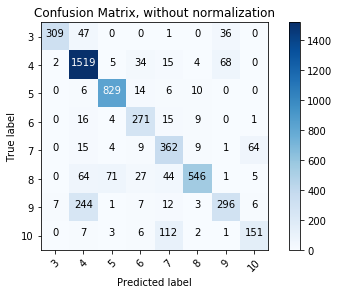

Normalized confusion matrix
[[ 0.79  0.12  0.    0.    0.    0.    0.09  0.  ]
 [ 0.    0.92  0.    0.02  0.01  0.    0.04  0.  ]
 [ 0.    0.01  0.96  0.02  0.01  0.01  0.    0.  ]
 [ 0.    0.05  0.01  0.86  0.05  0.03  0.    0.  ]
 [ 0.    0.03  0.01  0.02  0.78  0.02  0.    0.14]
 [ 0.    0.08  0.09  0.04  0.06  0.72  0.    0.01]
 [ 0.01  0.42  0.    0.01  0.02  0.01  0.51  0.01]
 [ 0.    0.02  0.01  0.02  0.4   0.01  0.    0.54]]


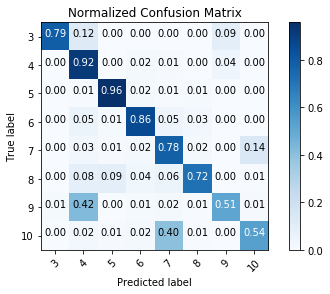

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = random_forest.predict(X_validate)


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_validate, Y_pred, labels=[3,4,5,6,7,8,9,10])

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = cm #confusion_matrix(y_test, Y_pred)
#class_names = ["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]
class_names = [3,4,5,6,7,8,9,10]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names,
                      title='Confusion Matrix, without normalization')


#plt.savefig('cnf matrix', dpi=150)
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

#plt.figure(figsize=(16,8))
#plt.savefig('cnf matrix norm', dpi=150)
plt.show()


In [47]:
print X_validate.shape,Y_pred.shape, Y_validate.shape
print  round(random_forest.score(X_validate, Y_validate) * 100, 2)


(6000, 242) (6000,) (6000,)
74.68
